In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/GOKUL/Downloads/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
## Categorise the countries using some socio-economic and health factors that determine the overall development 
## of the country.

In [4]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["country"]=le.fit_transform(data["country"])

data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
x = data.iloc[:,1:10].values
x

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

<AxesSubplot:>

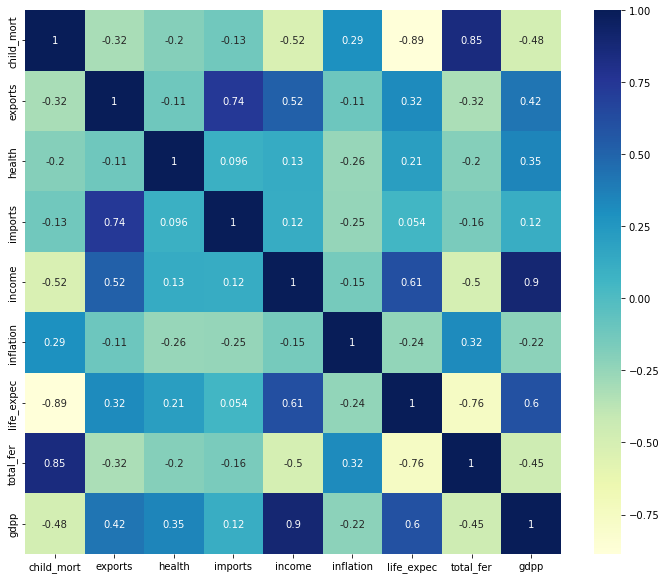

In [9]:
plt.figure(figsize=(12,10))
df_corr = (data.drop('country',axis=1)).corr()
sns.heatmap(df_corr,cmap="YlGnBu",annot=True)

Observations - Child mortality rate, life expectancy and total fertility are highly correlated.
GDPP is highly correlated with exports, imports, health and income. If GDPP is good, income will be is good 
and will have good health infra so, health is not an issue. 


In [10]:
import scipy.cluster.hierarchy as sch

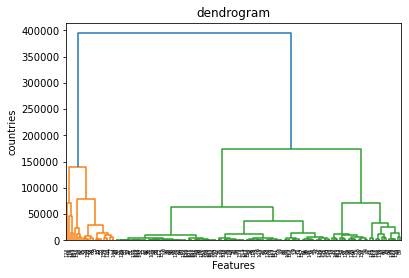

In [11]:
dg = sch.dendrogram(sch.linkage(x,method="ward")) ## Linkage function specifying the distance between two clusters
plt.title("dendrogram")
plt.xlabel("Features")
plt.ylabel("countries")
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
pred_cluster = ag.fit_predict(x)
pred_cluster

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [13]:
data["cluster"] = pred_cluster
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


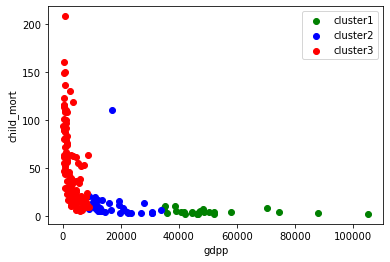

In [14]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1["gdpp"],df1["child_mort"],color = "green",label="cluster1")
plt.scatter(df2["gdpp"],df2["child_mort"],color = "blue",label="cluster2")
plt.scatter(df3["gdpp"],df3["child_mort"],color = "red",label="cluster3")

plt.xlabel("gdpp")
plt.ylabel("child_mort")

plt.legend()

plt.show()

In [17]:
data[['gdpp','income','child_mort','cluster']].groupby('cluster').mean()

,gdpp,income,child_mort
cluster,,,
0,51287.500000,53250.000000,5.037500
1,17432.571429,25505.714286,12.340000
2,2999.759259,6411.694444,54.058333


<AxesSubplot:xlabel='cluster'>

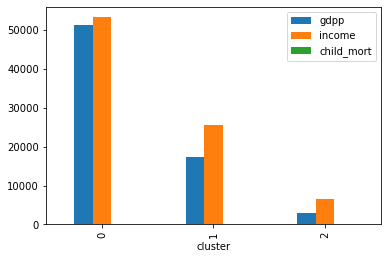

In [19]:
data[['gdpp','income','child_mort','cluster']].groupby('cluster').mean().plot(kind='bar')

Observations - 
From the above barplot and data frame we can notice 3 clusters with different characteristics as follows

Low GDPP, low Income and high Child_mortality.

Medium GDPP, income and Child_mortality.

High GDPP, high income and low Child_mortality

In [21]:
data[data['cluster']==0].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head()

## Lower GDP, lower income but higher child mortality !!! Hence countries that require urgent help

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
157,157,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,0
23,23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
75,75,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,0
82,82,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,0
158,158,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900,0


The countries which require urgent funding are -

Liberia
Burundi
Congo, Dem. Rep
Niger
Sierra Leone